<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [32]:
import pandas as pd
import matplotlib.pyplot as plt

Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [22]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [23]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [24]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [25]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [26]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


Plot the histogram for the column `ConvertedComp`.


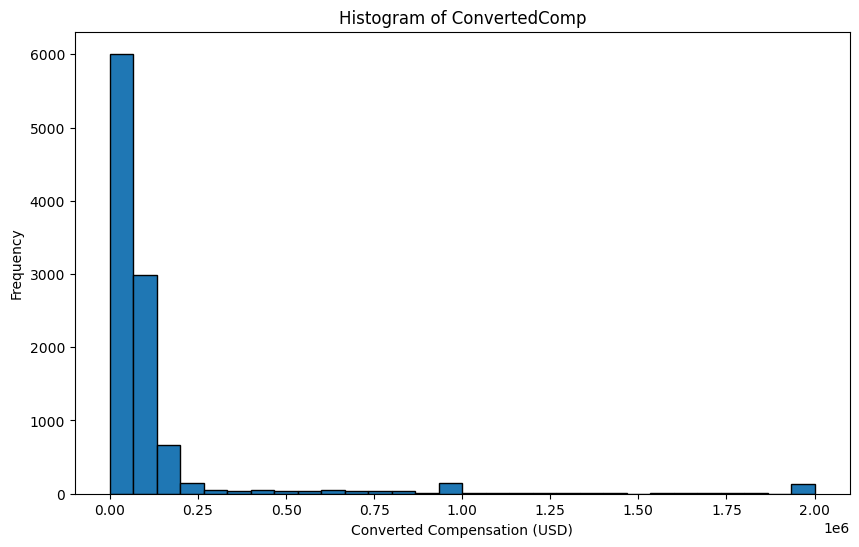

In [38]:
import matplotlib.pyplot as plt

# Plot the histogram for the column ConvertedComp
plt.figure(figsize=(10,6))
plt.hist(df['ConvertedComp'].dropna(), bins=30, edgecolor='k')
plt.title('Histogram of ConvertedComp')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.show()


What is the median of the column `ConvertedComp`?


In [39]:
# your code goes here
# Calculate the median of the column ConvertedComp
median_converted_comp = df['ConvertedComp'].median()
print(f"Median of ConvertedComp: {median_converted_comp}")


Median of ConvertedComp: 57745.0


How many responders identified themselves only as a **Man**?


In [40]:
# Count how many responders identified themselves only as a Man
man_count = df[df['Gender'] == 'Man'].shape[0]
print(f"Number of responders who identified themselves only as a Man: {man_count}")


Number of responders who identified themselves only as a Man: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [41]:
# your code goes here
# Calculate the median ConvertedComp for responders identified only as a Woman
median_converted_comp_woman = df[df['Gender'] == 'Woman']['ConvertedComp'].median()
print(f"Median ConvertedComp for responders identified themselves only as a Woman: {median_converted_comp_woman}")


Median ConvertedComp for responders identified themselves only as a Woman: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [42]:
# your code goes here
# Give the five-number summary for the column Age
five_num_summary_age = df['Age'].describe()[['min', '25%', '50%', '75%', 'max']]
print(f"Five-number summary for Age:\n{five_num_summary_age}")


Five-number summary for Age:
min    16.0
25%    25.0
50%    29.0
75%    35.0
max    99.0
Name: Age, dtype: float64


Plot a histogram of the column `Age`.


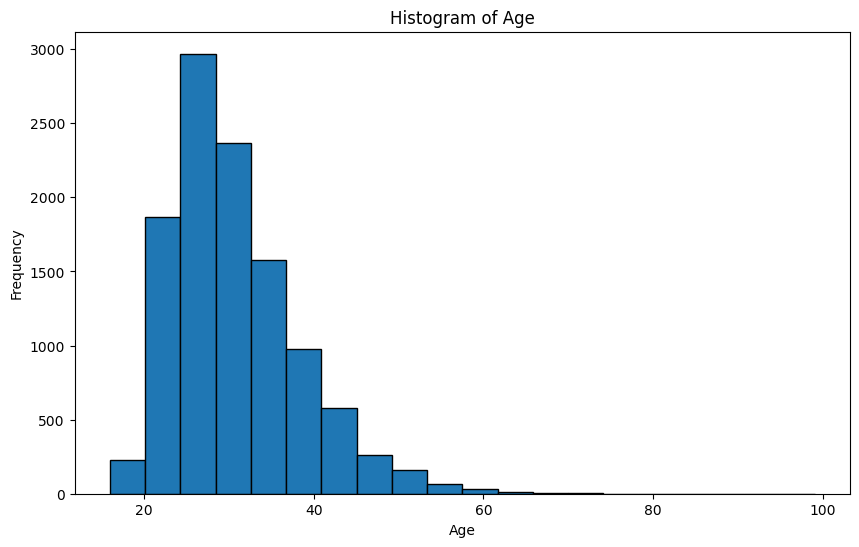

In [43]:
# your code goes here
# Plot a histogram of the column Age
plt.figure(figsize=(10,6))
plt.hist(df['Age'].dropna(), bins=20, edgecolor='k')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


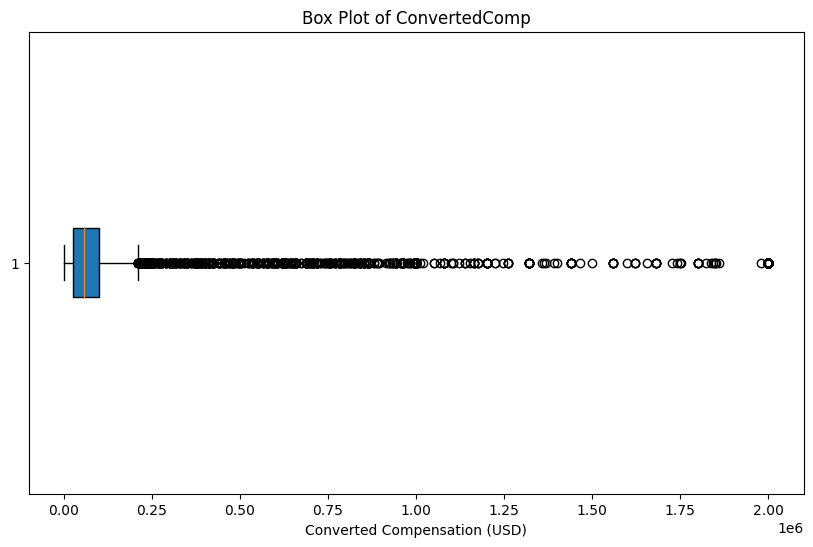

In [52]:
# Create a box plot for the ConvertedComp column
plt.figure(figsize=(10,6))
plt.boxplot(df['ConvertedComp'].dropna(), vert=False, patch_artist=True)
plt.title('Box Plot of ConvertedComp')
plt.xlabel('Converted Compensation (USD)')
plt.show()


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [54]:
# your code goes here
# Calculate the first quartile (Q1) and the third quartile (Q3)
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1
print(f"Interquartile Range (IQR) for ConvertedComp: {IQR}")

# Calculate the median of the ConvertedComp before removing outliers
median_converted_comp_before = df['ConvertedComp'].median()
print(f"Median ConvertedComp before removing outliers: {median_converted_comp_before}")



Interquartile Range (IQR) for ConvertedComp: 73132.0
Median ConvertedComp before removing outliers: 57745.0


Find out the upper and lower bounds.


In [55]:
# your code goes here
# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

# Create a new DataFrame by removing the outliers
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Calculate the median of the ConvertedComp after removing outliers
median_converted_comp_after = df_no_outliers['ConvertedComp'].median()
print(f"Median ConvertedComp after removing outliers: {median_converted_comp_after}")



Lower Bound: -82830.0
Upper Bound: 209698.0
Median ConvertedComp after removing outliers: 52704.0


Identify how many outliers are there in the `ConvertedComp` column.


Number of outliers in ConvertedComp: 879


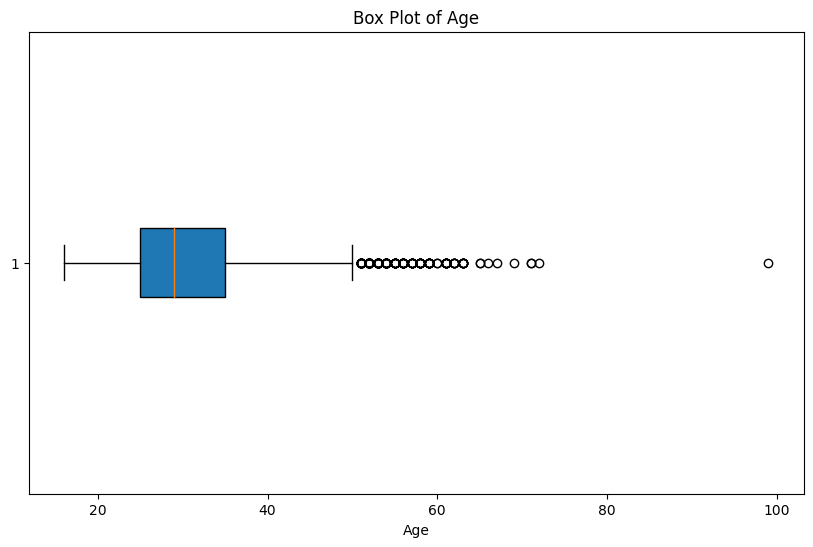

In [56]:
# your code goes here
# Identify the number of outliers
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]
num_outliers = outliers.shape[0]
print(f"Number of outliers in ConvertedComp: {num_outliers}")

import matplotlib.pyplot as plt

# Plot a boxplot for Age
plt.figure(figsize=(10,6))
plt.boxplot(df['Age'].dropna(), vert=False, patch_artist=True)
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()



Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [57]:
# your code goes here
# Create a new DataFrame by removing the outliers
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]
print(f"Number of rows after removing outliers: {df_no_outliers.shape[0]}")

# Calculate the mean of the ConvertedComp after removing outliers
mean_converted_comp_after = df_no_outliers['ConvertedComp'].mean()
print(f"Mean ConvertedComp after removing outliers: {mean_converted_comp_after}")




Number of rows after removing outliers: 9703
Mean ConvertedComp after removing outliers: 59883.20838915799


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [58]:
# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Find the correlation between Age and all other numerical columns
correlation_with_age = numeric_df.corr()['Age']
print("Correlation between Age and other numerical columns:")
print(correlation_with_age)

# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation between Age and other numerical columns
correlation_with_age = numeric_df.corr()['Age']
print("Correlation between Age and other numerical columns:")
print(correlation_with_age)


Correlation between Age and other numerical columns:
Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64
Correlation between Age and other numerical columns:
Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
